<a href="https://colab.research.google.com/github/Lokeshkonga3/TITANIC-SURVIVAL-PREDICTION-USING-MACHINE-LEARNING-MODELS/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis='columns',errors='ignore')


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:

df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
# Convert categorical columns to numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Train Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Train Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# Evaluate Linear Regression
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression - R² Score:", r2_score(y_test, y_pred_lr))
# Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))


Linear Regression - MSE: 0.1351938212761502
Linear Regression - R² Score: 0.4425038317234068
Decision Tree - Accuracy: 0.7821229050279329


In [ ]:
import matplotlib.pyplot as plt

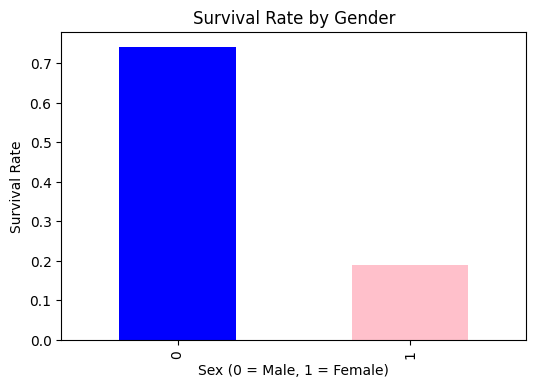

In [ ]:
# Survival count based on Sex
plt.figure(figsize=(6, 4))
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['blue', 'pink'])
plt.title("Survival Rate by Gender")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Survival Rate")
plt.show()


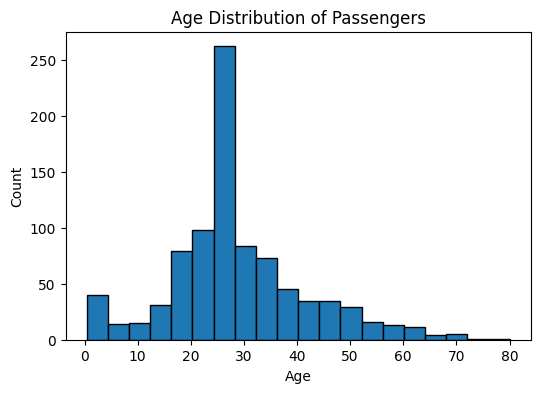

In [ ]:
# Age distribution of passengers
plt.figure(figsize=(6, 4))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


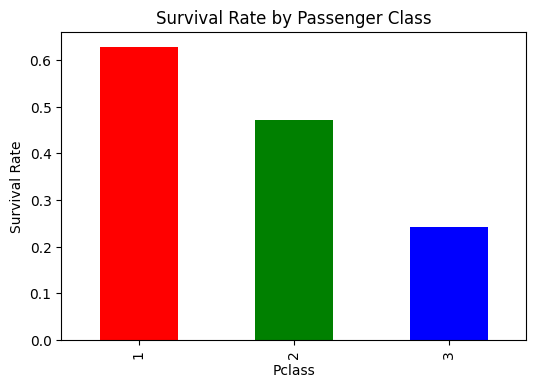

In [ ]:
# Passenger class survival rate
plt.figure(figsize=(6, 4))
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.show()
